# Explore here

In [ ]:
# Import libraries
import pandas as pd
import numpy as np


"""
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from prophet import Prophet
from pmdarima import auto_arima
"""

Uploaded the file "Aquifer_Petrignano" in the Codespaces repository.

In [7]:
### DATA ANALYSIS FOR WATERBODIES IN ITALY
### PREDICT THE AMOUNT OF WATER IN THE AQUIFER PETRIGNANO
### TWO VARIABLES TO PREDICT: DEPTH_TO_GROUNDWATER_P24 AND DEPTH_TO_GROUNDWATER_P25

# Get sales dataset
df = pd.read_csv("/workspaces/Time-Series-project_AR/data/raw/Aquifer_Petrignano.csv")
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [10]:
df=pd.read_csv("https://github.com/stevengash/Aquifer-TimeSeries-Analysis-Visualization/blob/main/Aquifer_Petrignano.csv")
df.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 42, saw 42


In [8]:
df=pd.read_csv("https://github.com/stevengash/Aquifer-TimeSeries-Analysis-Visualization/blob/main/Aquifer_Petrignano.csv", sep=',,')
df.head()

/tmp/ipykernel_718/3567444819.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv("https://github.com/stevengash/Aquifer-TimeSeries-Analysis-Visualization/blob/main/Aquifer_Petrignano.csv", sep=',,')


,<!DOCTYPE html>
0,<html
1,"lang=""en"""
2,"data-color-mode=""auto"" data-light-theme=""light..."
3,"data-a11y-animated-images=""system"" data-a11y-l..."
4,>


In [6]:
# Get sales dataset
df = pd.read_csv("C:\\Users\\anaru\\Downloads\\Aquifer_Petrignano.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\anaru\\Downloads\\Aquifer_Petrignano.csv'

In [ ]:
# Get sales dataset
df = pd.read_csv("C:\Users\anaru\Downloads\Aquifer_Petrignano.csv")
df.head()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3094589175.py, line 2)

In [3]:
df.head().T

,0,1,2,3,4
Date,14/03/2006,15/03/2006,16/03/2006,17/03/2006,18/03/2006
Rainfall_Bastia_Umbra,NaN,NaN,NaN,NaN,NaN
Depth_to_Groundwater_P24,-22.48,-22.38,-22.25,-22.38,-22.6
Depth_to_Groundwater_P25,-22.18,-22.14,-22.04,-22.04,-22.04
Temperature_Bastia_Umbra,NaN,NaN,NaN,NaN,NaN
Temperature_Petrignano,NaN,NaN,NaN,NaN,NaN
Volume_C10_Petrignano,NaN,NaN,NaN,NaN,NaN
Hydrometry_Fiume_Chiascio_Petrignano,NaN,NaN,NaN,NaN,NaN


In [4]:
# Shape of the dataframe
df.shape

(5223, 8)

In [5]:
# Summary of the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [6]:
# Description of the numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall_Bastia_Umbra,4199.0,1.556633,5.217923,0.000,0.00,0.00,0.10,67.30
Depth_to_Groundwater_P24,5168.0,-26.263723,3.319858,-34.470,-28.25,-25.99,-23.82,-19.66
Depth_to_Groundwater_P25,5184.0,-25.692926,3.214165,-33.710,-27.62,-25.54,-23.43,-19.10
Temperature_Bastia_Umbra,4199.0,15.030293,7.794871,-3.700,8.80,14.70,21.40,33.00
Temperature_Petrignano,4199.0,13.739081,7.701369,-4.200,7.70,13.50,20.00,31.10
Volume_C10_Petrignano,5025.0,-29043.296726,4751.864371,-45544.896,-31678.56,-28689.12,-26218.08,0.00
Hydrometry_Fiume_Chiascio_Petrignano,4199.0,2.372517,0.589088,0.000,2.10,2.40,2.70,4.10


Rainfall_Bastia_Umbra column has a minimum of 0 (no rain) and a maximum of 67.30. The mode (50%) is 0 and the mean is 1.5 so there are more days with rain (skew positive).

For the other variables, the mean and the mode are similar so they have approximately a symmetrical distribution. 

Depth_to_Groundwater_P24 column has a minimum of -34.47 and a maximum of -19.66 (the values are negatives).

Depth_to_Groundwater_P25 column has a minimum of -33.71 and a maximum of -19.10 (the values are negatives).

Temperature_Bastia_Umbra column has a minimum of -3.7 and a maximum of 33.

Temperature Petrignano column has a minimum of -4.2 and a maximum of 31.1.

Volume_C10_Petrignano (this drainage volume term refers to the amount of water taken from the drinking water treatment plant) has a minimum of -45544.89 and a maximum of 0 (the values are negatives).

Hydrometry_Fiume_Chiascio_Petrignano (level of the Chiascio river) has a minimum of 0 and a maximum of 4.1.

In [7]:
print(type(df["Date"]))

<class 'pandas.core.series.Series'>


In [8]:
# Get the unique values of Date column
print(f"Date values: {df['Date'].unique()}")

Date values: ['14/03/2006' '15/03/2006' '16/03/2006' ... '28/06/2020' '29/06/2020'
 '30/06/2020']


The dataset includes values of rainfall, depths to groundwater, temperatures, drainage volume and level of the Chiascio river from 14/03/2006 to 30/06/2020, a total of 5223 days that it is a little more than 14 years.

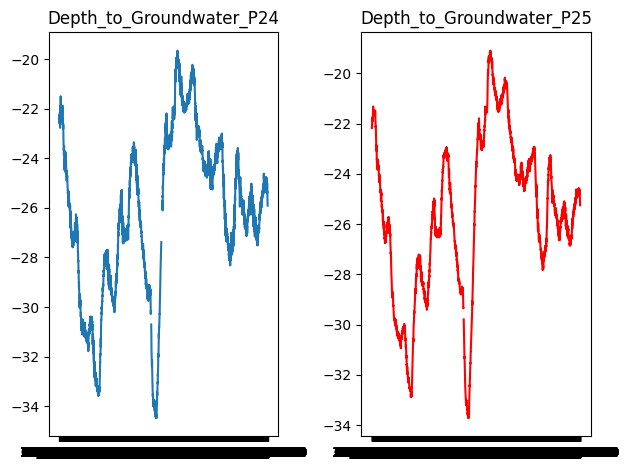

In [9]:
# Plot the Depth_to_Groundwater_P24 and P25 over time
fig, ax = plt.subplots(1, 2)
ax[0].plot(df['Date'],df['Depth_to_Groundwater_P24'])
ax[1].plot(df['Date'],df['Depth_to_Groundwater_P25'], 'r')
# Add titles
ax[0].set_title('Depth_to_Groundwater_P24')
ax[1].set_title('Depth_to_Groundwater_P25')
# Adjust layout for better spacing
plt.tight_layout()
# Display the figure
plt.show()

Graphically, the time series for the two Depth_to_Groundwater values have a very similar pattern.

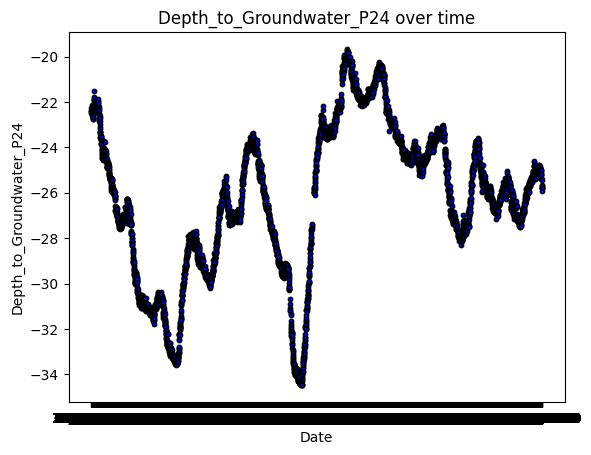

In [10]:
# Plot Depth_to_Groundwater_P24 over time
plt.scatter(df['Date'],df['Depth_to_Groundwater_P24'], color='blue', marker='o', s=10, edgecolor='black')
# Add title
plt.title('Depth_to_Groundwater_P24 over time')
# Add labels
plt.xlabel('Date')
plt.ylabel('Depth_to_Groundwater_P24')
# Display the figure
plt.show()


In year 2012, there was an increase in a short period of time (probably, an inundation) and in year 2013, there was a very high decrease in a short perior of time (probably, a drought). 

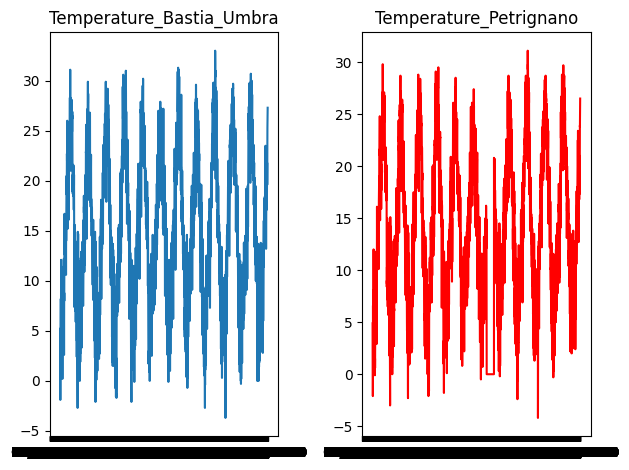

In [11]:
# Plot the Temperatures over time
fig, ax = plt.subplots(1, 2)
ax[0].plot(df['Date'],df['Temperature_Bastia_Umbra'])
ax[1].plot(df['Date'],df['Temperature_Petrignano'], 'r')
# Add titles
ax[0].set_title('Temperature_Bastia_Umbra')
ax[1].set_title('Temperature_Petrignano')
# Adjust layout for better spacing
plt.tight_layout()
# Display the figure
plt.show()

Graphically, the time series for both Temperatures have a similar pattern.

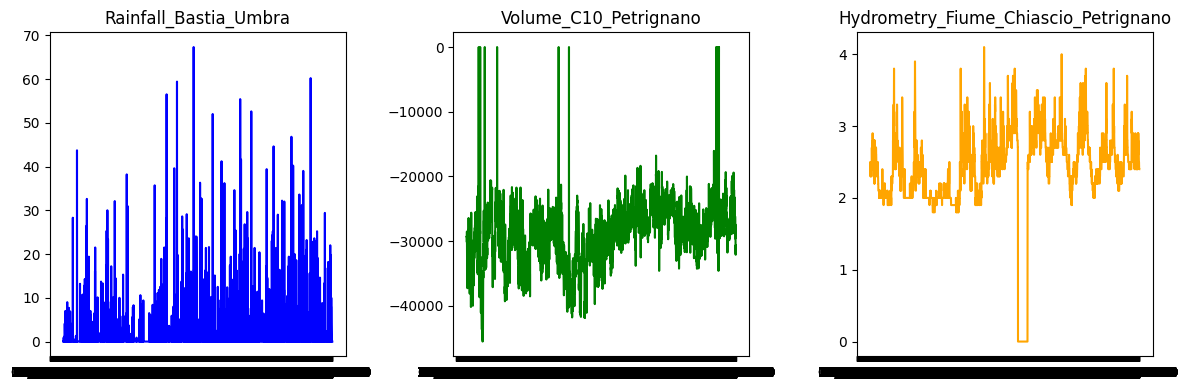

In [12]:
# Plot the Rainfall, Volume and Hydrometry values over time
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].plot(df['Date'], df["Rainfall_Bastia_Umbra"], color='blue')
ax[1].plot(df['Date'], df["Volume_C10_Petrignano"], color='green')
ax[2].plot(df['Date'], df["Hydrometry_Fiume_Chiascio_Petrignano"], color='orange')
# Add titles
ax[0].set_title('Rainfall_Bastia_Umbra')
ax[1].set_title('Volume_C10_Petrignano')
ax[2].set_title('Hydrometry_Fiume_Chiascio_Petrignano')
#for ax in axes:
#    ax.legend() 
# Adjust layout for better spacing
plt.tight_layout()
# Display the figure
plt.show()

Graphically, it seems that there is not a same pattern for these three variables.

In [13]:
sorted_df = df.sort_values(by='Hydrometry_Fiume_Chiascio_Petrignano')
sorted_df.head(30)


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
3447,21/08/2015,0.0,-22.74,-22.19,22.0,0.0,-27593.568,0.0
3436,10/08/2015,2.4,-22.32,-21.83,21.9,0.0,-19692.288,0.0
3437,11/08/2015,0.0,-22.44,-21.86,25.0,0.0,-24516.864,0.0
3438,12/08/2015,0.0,-22.47,-21.89,27.3,0.0,-26351.136,0.0
3439,13/08/2015,0.0,-22.55,-21.93,28.0,0.0,-27103.680,0.0
3440,14/08/2015,0.0,-22.58,-21.94,28.5,0.0,-27241.920,0.0
3441,15/08/2015,2.4,-22.56,-21.95,25.4,0.0,-24745.824,0.0
3442,16/08/2015,7.6,-22.18,-21.80,21.1,0.0,-18365.184,0.0
3443,17/08/2015,0.2,-22.36,-21.85,22.3,0.0,-22640.256,0.0
3444,18/08/2015,0.2,-22.46,-21.90,23.6,0.0,-25101.792,0.0


The Hydrometry_Fiume_Chiascio_Petrignano plot shows a lot of zero values in 2015, these zeros could be missing data because they are too many data for a drought.

In [14]:
# Start Exploratory data analysis (EDA)
# Check if duplicate rows in the dataframe
print(f"Duplicate rows: {df.duplicated().sum():.2f}")

Duplicate rows: 0.00


There are not duplicate rows in the dataframe.

In [15]:
# Number of unique values in the dataframe
df.nunique()

Date                                    5223
Rainfall_Bastia_Umbra                    223
Depth_to_Groundwater_P24                1306
Depth_to_Groundwater_P25                1298
Temperature_Bastia_Umbra                 336
Temperature_Petrignano                   320
Volume_C10_Petrignano                   4324
Hydrometry_Fiume_Chiascio_Petrignano      25
dtype: int64

In [16]:
# Check if any missing values in the dataframe
df.isna().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

There are four variables (Rainfall, 2 Temperatures and Hydrometry) with 1024 NaN values.
Let's check if the NaN values are the first rows of the dataset.

In [17]:
# Get the unique values of Rainfall_Bastia_Umbra column
print(f"Rainfall_Bastia_Umbra values: {df['Rainfall_Bastia_Umbra'].unique()}")

Rainfall_Bastia_Umbra values: [ nan  0.   0.9  1.1  0.1  4.1  2.9  7.   0.4  2.8  0.8  3.4  6.5  9.
  0.5  2.7  2.5  0.2  7.7  0.6  6.9  0.3 28.3  1.3 43.7 13.2 10.6  7.1
 10.8  4.4 12.8  7.5 14.3 11.9  5.1  3.  26.5 32.6  3.6 12.7 19.4  3.3
  1.2  6.   4.5 16.1 19.8 21.5  3.7  2.2 10.1  5.3  2.  13.7  1.7 13.3
  8.9 17.4 25.3  8.  30.   7.2 23.4  9.1  7.3 17.2  5.9  8.4  4.7 32.1
 14.5  5.2  1.  10.   5.   5.8 15.3 38.2 30.9  1.8  1.6  1.9  2.4  5.6
  7.9  8.3  2.1  8.5  9.4  6.1  5.5 35.7  6.3  3.1  8.2 11.1 10.5 11.8
 11.  12.5  6.8 18.9  3.5  5.7 12.  13.   9.3  1.5  5.4 28.2 22.9 56.5
  4.  39.6 10.7 31.2 59.4  3.8  9.9  3.2 13.6 28.6  1.4  7.4  0.7 11.3
 25.6  4.3 12.2 15.6 29.1  6.7  7.8 23.6 14.7  6.4 16.  15.7 11.4  4.8
 67.3 16.4  8.8  9.5 24.  20.1 15.4 17.8 36.3  7.6 32.8 14.6 14.2 16.3
 21.4  9.2 15.9 21.6 10.2 52.  10.4  8.7 15.1 41.2 20.2 27.4 36.2 12.4
  4.2  6.2  9.8  8.6 12.6  4.6 22.6 34.6  6.6 16.6 25.4 19.2 16.2 11.6
 20.  55.4 41.6  2.6 18.4 21.2 26.8  9.6 29.6 52

In [18]:
# Print the first 1024 values of Rainfall_Bastia_Umbra column
print(df['Rainfall_Bastia_Umbra'][:1025])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1020    NaN
1021    NaN
1022    NaN
1023    NaN
1024    0.0
Name: Rainfall_Bastia_Umbra, Length: 1025, dtype: float64


In [19]:
# Get the unique values of the first 1024 rows for the Rainfall_Bastia_Umbra column
print(f"Rainfall_Bastia_Umbra values: {df['Rainfall_Bastia_Umbra'][:1024].unique()}")

Rainfall_Bastia_Umbra values: [nan]


There are not Rainfall_Bastia_Umbra values for the first 1024 days (almost 3 years) of the dataset.

In [20]:
# Get the unique values of the first 1024 rows for the Temperature_Bastia_Umbra column
print(f"Temperature_Bastia_Umbra values: {df['Temperature_Bastia_Umbra'][:1024].unique()}")

Temperature_Bastia_Umbra values: [nan]


There are not Temperature_Bastia_Umbra values for the first 1024 days (almost 3 years) of the dataset.

In [21]:
# Get the unique values of the first 1024 rows for the Temperature_Petrignano column
print(f"Temperature_Petrignano values: {df['Temperature_Petrignano'][:1024].unique()}")

Temperature_Petrignano values: [nan]


There are not Temperature_Petrignano values for the first 1024 days (almost 3 years) of the dataset.

In [22]:
# Get the unique values of the first 1024 rows for the Hydrometry_Fiume_Chiascio_Petrignano column
print(f"Hydrometry_Fiume_Chiascio_Petrignano values: {df['Hydrometry_Fiume_Chiascio_Petrignano'][:1023].unique()}")

Hydrometry_Fiume_Chiascio_Petrignano values: [nan]


There are not Hydrometry_Fiume_Chiascio_Petrignano values for the first 1024 days (almost 3 years) of the dataset.

The dataset has values for almost 14 years, it is a lot of days and there are four variables with NaN values for the first 1024 days so, the first 1024 rows will be dropped because they have NaN values for 4 variables.

In [23]:
# Drop the first 1024 rows of the dataframe
df2 = df.drop(df.index[:1024])
df2.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
1024,01/01/2009,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1025,02/01/2009,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
1026,03/01/2009,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
1027,04/01/2009,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
1028,05/01/2009,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3


In [24]:
df2.shape

(4199, 8)

In [25]:
# Reset the indexes of df2
df2 = df2.reset_index(drop=True)
df2

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,01/01/2009,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1,02/01/2009,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2,03/01/2009,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
3,04/01/2009,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3
...,...,...,...,...,...,...,...,...
4194,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
4195,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
4196,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
4197,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [26]:
# Check if any missing values in the dataframe
df2.isna().sum()

Date                                     0
Rainfall_Bastia_Umbra                    0
Depth_to_Groundwater_P24                39
Depth_to_Groundwater_P25                27
Temperature_Bastia_Umbra                 0
Temperature_Petrignano                   0
Volume_C10_Petrignano                    1
Hydrometry_Fiume_Chiascio_Petrignano     0
dtype: int64

Fill the missing values of the dataframe df2:

Depth_to_Groundwater_P24 and P25: the missing values to be filled with the mean of the previous and next day.

Volume_C10_Petrignano: the missing value to be filled with the mean of the previous and next day.

In [27]:
# Get the unique values of Depth_to_Groundwater_P24 column
print(f"Depth_to_Groundwater_P24 values: {df2['Depth_to_Groundwater_P24'].unique()}")

Depth_to_Groundwater_P24 values: [-31.96 -32.03 -31.97 ... -25.66 -24.93 -24.83]


In [28]:
# Get the unique values of Depth_to_Groundwater_P25 column
print(f"Depth_to_Groundwater_P25 values: {df2['Depth_to_Groundwater_P25'].unique()}")

Depth_to_Groundwater_P25 values: [-31.14 -31.11 -31.07 ... -26.52 -24.88 -24.75]


In [29]:
# Fill the missing values of Depth_to_Groundwater_P24 and P25 columns with the mean of the previous and next day
df2['Depth_to_Groundwater_P24'].fillna((df['Depth_to_Groundwater_P24'].ffill() + df2['Depth_to_Groundwater_P24'].bfill()) / 2, inplace=True)
df2['Depth_to_Groundwater_P25'].fillna((df['Depth_to_Groundwater_P25'].ffill() + df2['Depth_to_Groundwater_P25'].bfill()) / 2, inplace=True)

/tmp/ipykernel_796/4273720897.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Depth_to_Groundwater_P24'].fillna((df['Depth_to_Groundwater_P24'].ffill() + df2['Depth_to_Groundwater_P24'].bfill()) / 2, inplace=True)
/tmp/ipykernel_796/4273720897.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [30]:
# Get the unique values of Volume_C10_Petrignano column
print(f"Volume_C10_Petrignano values: {df2['Volume_C10_Petrignano'].unique()}")

Volume_C10_Petrignano values: [-24530.688 -28785.888 -25766.208 ... -30923.424 -32120.928 -30602.88 ]


In [31]:
# Fill the missing value of Volume_C10_Petrignano column with the mean of the previous and next day
df2['Volume_C10_Petrignano'].fillna((df['Volume_C10_Petrignano'].ffill() + df2['Volume_C10_Petrignano'].bfill()) / 2, inplace=True)

/tmp/ipykernel_796/3925232765.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Volume_C10_Petrignano'].fillna((df['Volume_C10_Petrignano'].ffill() + df2['Volume_C10_Petrignano'].bfill()) / 2, inplace=True)


In [32]:
# Check if any missing values in the dataframe
df2.isna().sum()

Date                                    0
Rainfall_Bastia_Umbra                   0
Depth_to_Groundwater_P24                0
Depth_to_Groundwater_P25                0
Temperature_Bastia_Umbra                0
Temperature_Petrignano                  0
Volume_C10_Petrignano                   0
Hydrometry_Fiume_Chiascio_Petrignano    0
dtype: int64

In [33]:
# Determine the type of the first Date element
print(type(df2.at[0,"Date"]))

<class 'str'>


In [34]:
print(df2.at[0,"Date"])

01/01/2009


In [35]:
# Convert the column "date" to datetime
df2.Date = pd.to_datetime(df2.Date, format="%d/%m/%Y")
df2.dtypes

Date                                    datetime64[ns]
Rainfall_Bastia_Umbra                          float64
Depth_to_Groundwater_P24                       float64
Depth_to_Groundwater_P25                       float64
Temperature_Bastia_Umbra                       float64
Temperature_Petrignano                         float64
Volume_C10_Petrignano                          float64
Hydrometry_Fiume_Chiascio_Petrignano           float64
dtype: object

In [36]:
# Unique values of the column "Date" in the dataframe in datetime format
df2['Date'].unique()

<DatetimeArray>
['2009-01-01 00:00:00', '2009-01-02 00:00:00', '2009-01-03 00:00:00',
 '2009-01-04 00:00:00', '2009-01-05 00:00:00', '2009-01-06 00:00:00',
 '2009-01-07 00:00:00', '2009-01-08 00:00:00', '2009-01-09 00:00:00',
 '2009-01-10 00:00:00',
 ...
 '2020-06-21 00:00:00', '2020-06-22 00:00:00', '2020-06-23 00:00:00',
 '2020-06-24 00:00:00', '2020-06-25 00:00:00', '2020-06-26 00:00:00',
 '2020-06-27 00:00:00', '2020-06-28 00:00:00', '2020-06-29 00:00:00',
 '2020-06-30 00:00:00']
Length: 4199, dtype: datetime64[ns]

To calculate the total days of a time series is needed to add one day to the subtraction of the first and last date.

In [37]:
# Calculate the total days of the column "Date"
print(f"Total number of days of the column Date: {1+((df2.Date.max()-df2.Date.min()).days)}")

Total number of days of the column Date: 4199


In [38]:
# Unique values of the column "Date" in the dataframe
df2.Date.nunique()

4199

The number of days of the column "Date" is the same than the number of unique values of the column "Date", there are not missing values in the column "Date".

The dataframe has values for 4199 days.

The tensor of this time serie is a day (minimum unit of time for which there is data).

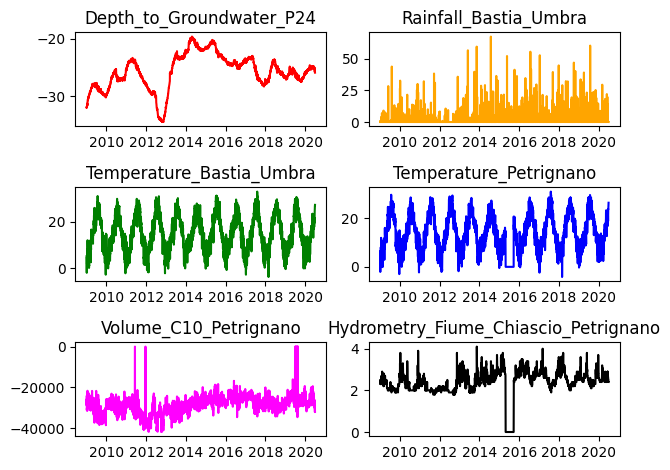

In [39]:
# Plot 6 subplots to visualize the variables over time
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
ax1.plot(df2['Date'],df2['Depth_to_Groundwater_P24'], color="red")
ax2.plot(df2['Date'],df2['Rainfall_Bastia_Umbra'], color="orange")
ax3.plot(df2['Date'],df2['Temperature_Bastia_Umbra'], color="green")
ax4.plot(df2['Date'],df2['Temperature_Petrignano'], color="blue")
ax5.plot(df2['Date'], df2['Volume_C10_Petrignano'], color="magenta")
ax6.plot(df2['Date'], df2['Hydrometry_Fiume_Chiascio_Petrignano'], color="black")
# Add titles
ax1.set_title('Depth_to_Groundwater_P24')
ax2.set_title('Rainfall_Bastia_Umbra')
ax3.set_title('Temperature_Bastia_Umbra')
ax4.set_title('Temperature_Petrignano')
ax5.set_title('Volume_C10_Petrignano')
ax6.set_title('Hydrometry_Fiume_Chiascio_Petrignano')
# Adjust layout for better spacing
plt.tight_layout()
# Display the figure
plt.show()

In [40]:
# Dataframe with the time series for Depth_to_Groundwater_P24
df_P24 = df2[["Date", "Depth_to_Groundwater_P24"]]

In [41]:
df_P24

,Date,Depth_to_Groundwater_P24
0,2009-01-01,-31.96
1,2009-01-02,-32.03
2,2009-01-03,-31.97
3,2009-01-04,-31.91
4,2009-01-05,-31.94
...,...,...
4194,2020-06-26,-25.68
4195,2020-06-27,-25.80
4196,2020-06-28,-25.80
4197,2020-06-29,-25.78


In [42]:
# PROPHET MODEL FOR Depth_to_Groundwater_P24
# Rename columns for Prophet model
df_P24.columns = ['ds', 'y']
df_P24.head()

,ds,y
0,2009-01-01,-31.96
1,2009-01-02,-32.03
2,2009-01-03,-31.97
3,2009-01-04,-31.91
4,2009-01-05,-31.94


In [43]:
# Fit Prophet model for "Depth_to_Groundwater_P24" values
prophet_model = Prophet().fit(df_P24)

10:18:02 - cmdstanpy - INFO - Chain [1] start processing
10:18:04 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
# Predict future "Depth_to_Groundwater_P24" values for 365 days
df_future = prophet_model.make_future_dataframe(periods=365, freq='d')
df_future.tail()

,ds
4559,2021-06-26
4560,2021-06-27
4561,2021-06-28
4562,2021-06-29
4563,2021-06-30


In [45]:
# Values for "Depth_to_Groundwater_P24" with the forecast
forecast = prophet_model.predict(df_future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-01-01,-30.474169,-31.626875,-30.502048,-30.474169,-30.474169,-0.625900,-0.625900,-0.625900,-0.012380,-0.012380,-0.012380,-0.613520,-0.613520,-0.613520,0.0,0.0,0.0,-31.100069
1,2009-01-02,-30.463166,-31.671043,-30.514215,-30.463166,-30.463166,-0.631085,-0.631085,-0.631085,-0.022602,-0.022602,-0.022602,-0.608484,-0.608484,-0.608484,0.0,0.0,0.0,-31.094251
2,2009-01-03,-30.452163,-31.650486,-30.577494,-30.452163,-30.452163,-0.653368,-0.653368,-0.653368,-0.048971,-0.048971,-0.048971,-0.604397,-0.604397,-0.604397,0.0,0.0,0.0,-31.105531
3,2009-01-04,-30.441160,-31.547173,-30.453896,-30.441160,-30.441160,-0.568819,-0.568819,-0.568819,0.032359,0.032359,0.032359,-0.601178,-0.601178,-0.601178,0.0,0.0,0.0,-31.009979
4,2009-01-05,-30.430157,-31.610988,-30.434774,-30.430157,-30.430157,-0.562868,-0.562868,-0.562868,0.035861,0.035861,0.035861,-0.598730,-0.598730,-0.598730,0.0,0.0,0.0,-30.993025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4559,2021-06-26,-26.167714,-30.739687,-19.489061,-31.486445,-20.426288,0.837518,0.837518,0.837518,-0.048971,-0.048971,-0.048971,0.886489,0.886489,0.886489,0.0,0.0,0.0,-25.330196
4560,2021-06-27,-26.167921,-30.528184,-19.607014,-31.494006,-20.398513,0.892062,0.892062,0.892062,0.032359,0.032359,0.032359,0.859703,0.859703,0.859703,0.0,0.0,0.0,-25.275859
4561,2021-06-28,-26.168128,-30.698911,-19.422446,-31.501567,-20.373105,0.867867,0.867867,0.867867,0.035861,0.035861,0.035861,0.832006,0.832006,0.832006,0.0,0.0,0.0,-25.300261
4562,2021-06-29,-26.168335,-30.928070,-19.413922,-31.512583,-20.338504,0.819124,0.819124,0.819124,0.015624,0.015624,0.015624,0.803500,0.803500,0.803500,0.0,0.0,0.0,-25.349211


In [46]:
# Last predicted values for "Depth_to_Groundwater_P24"
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4559,2021-06-26,-25.330196,-30.739687,-19.489061
4560,2021-06-27,-25.275859,-30.528184,-19.607014
4561,2021-06-28,-25.300261,-30.698911,-19.422446
4562,2021-06-29,-25.349211,-30.928070,-19.413922
4563,2021-06-30,-25.394139,-30.734493,-19.357578


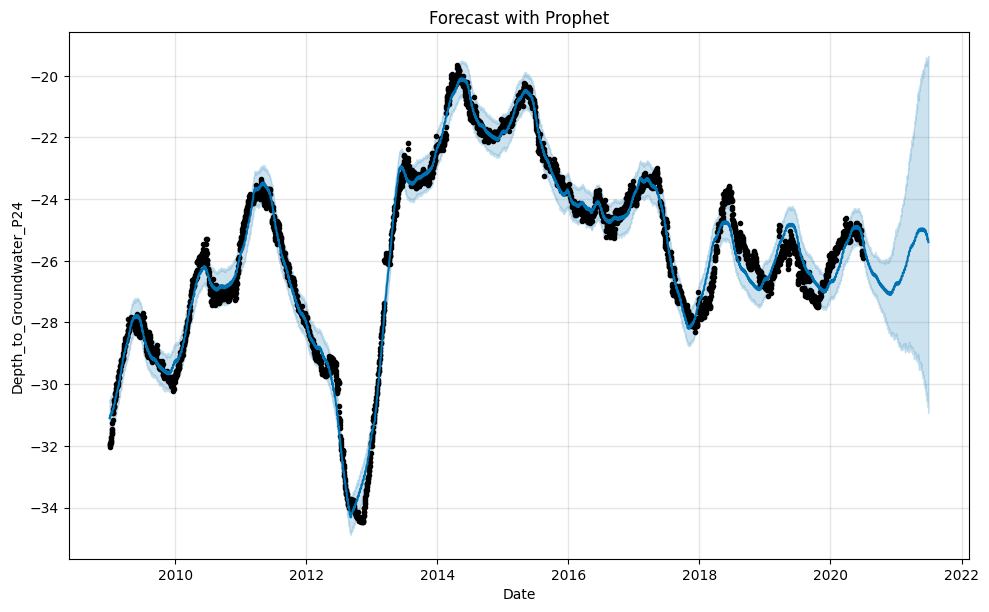

In [47]:
# Plot the forecast for "Depth_to_Groundwater_P24" for 365 days
prophet_model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Depth_to_Groundwater_P24')
plt.title('Forecast with Prophet')
plt.show()

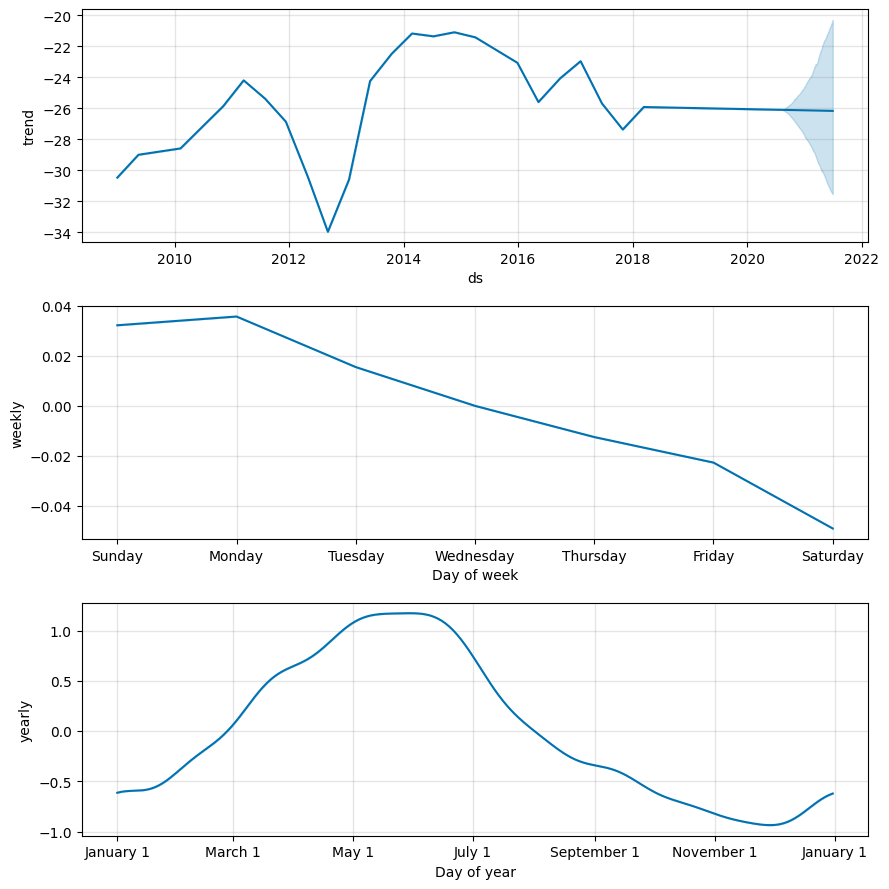

In [48]:
# Component of Prophet model for "Depth_to_Groundwater_P24"
prophet_model.plot_components(forecast)
plt.show()

In [49]:
# Dataframe with the time series for Depth_to_Groundwater_P25
df_P25 = df2[["Date", "Depth_to_Groundwater_P25"]]
df_P25.head()

,Date,Depth_to_Groundwater_P25
0,2009-01-01,-31.14
1,2009-01-02,-31.11
2,2009-01-03,-31.07
3,2009-01-04,-31.05
4,2009-01-05,-31.01


In [50]:
# ARIMA MODEL FOR Depth_to_Groundwater_P25
# Decompose the "Depth_to_Groundwater_P25" values into its trend, seasonality and residual components
ts=df2["Depth_to_Groundwater_P25"]
decomposition = seasonal_decompose(ts, period = 12)
decomposition

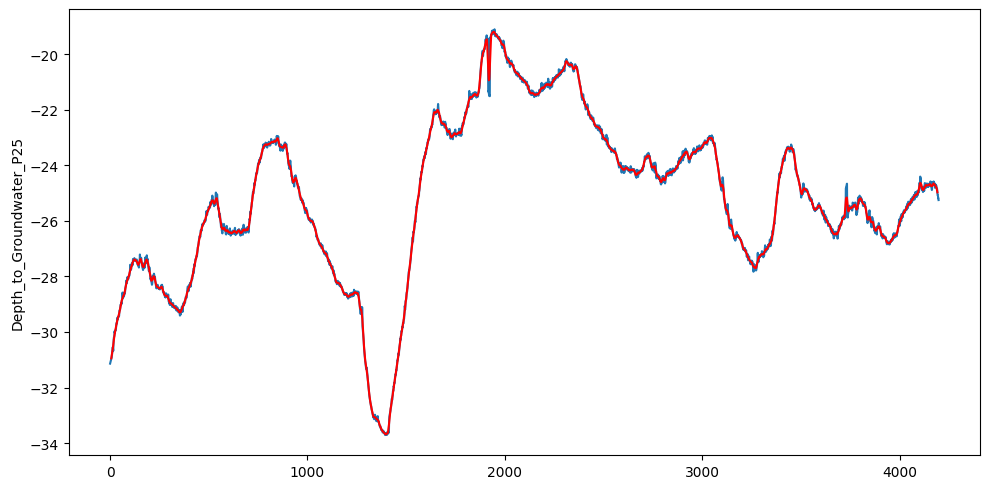

In [51]:
# Trend of "Depth_to_Groundwater_P25" values
trend = decomposition.trend
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts)
sns.lineplot(data = trend, color='red', linewidth=1.5)
plt.tight_layout()
plt.show()

There is not a trend over the years.

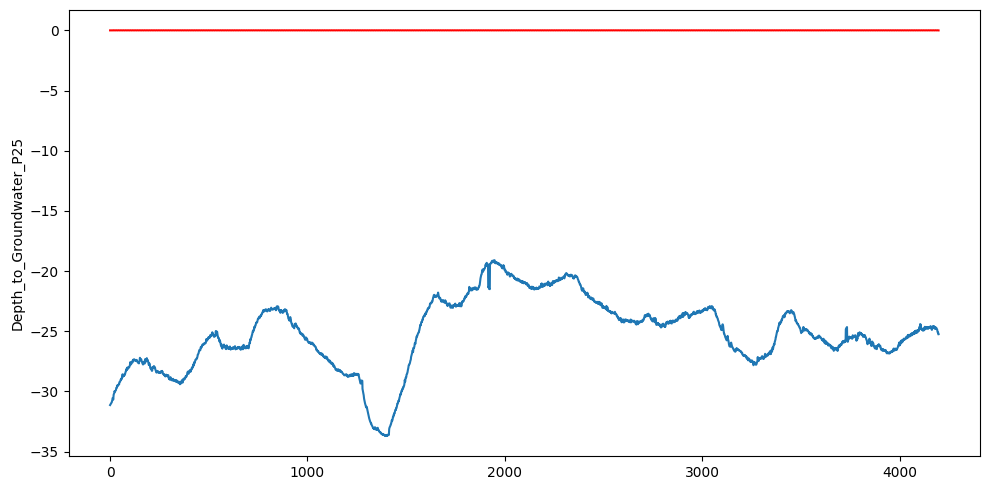

In [52]:
# Seasonality of "Depth_to_Groundwater_P25" values
seasonal = decomposition.seasonal
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts)
sns.lineplot(data = seasonal, color='red', linewidth=1.5)
plt.tight_layout()
plt.show()

The seasonality is zero for "Depth_to_Groundwater_P25" values, there is not a repeating short-term cycle or pattern for this time series.

In [53]:
# Stationarity test of "Depth_to_Groundwater_P25" values
def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Dickey-Fuller test results:


Test Statistic                   -2.511391
p-value                           0.112727
#Lags Used                       28.000000
Number of Observations Used    4170.000000
Critical Value (1%)              -3.431919
Critical Value (5%)              -2.862233
Critical Value (10%)             -2.567139
dtype: float64

According to the Dickey-Fuller test, the p-value is greater than 0.05 and we will take this "Depth_to_Groundwater_P25" time series as non-stationary.

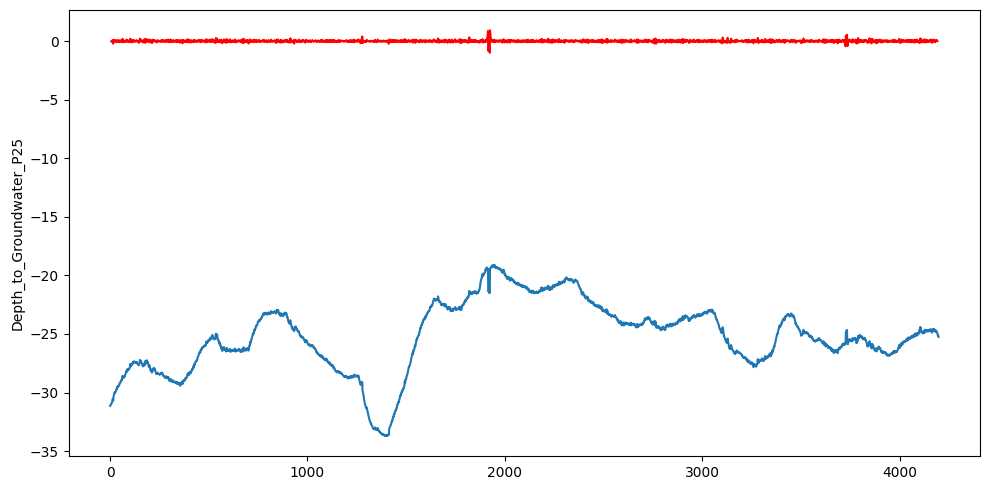

In [54]:
# Residuals of "Depth_to_Groundwater_P25" values
residual = decomposition.resid
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts)
sns.lineplot(data = residual, color='red', linewidth=1.5)
plt.tight_layout()
plt.show()

In [55]:
# Residual unique values for "Depth_to_Groundwater_P25"
residual.unique()

array([        nan, -0.01777712, -0.04042278, ...,  0.06650535,
        0.04904833,  0.00370569])

The waste load (residual) of this time series is not very high for the period studied.

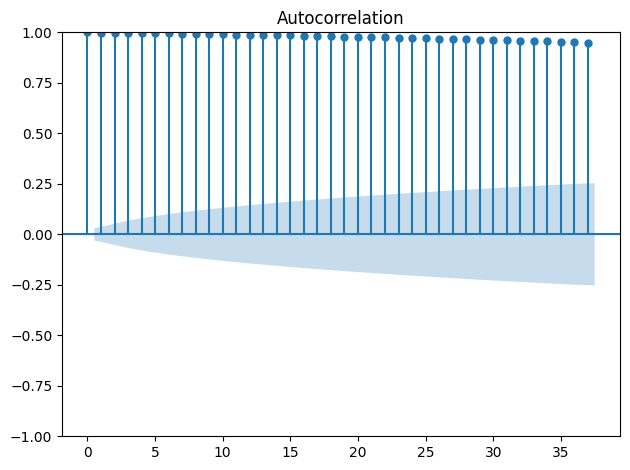

In [56]:
# Autocorrelation of "Depth_to_Groundwater_P25" values
plot_acf(ts)
plt.tight_layout()
plt.show()

There is a high correlation between the points and their delayed copies, which decreases a little bit over time.

In [57]:
# Transform the "Depth_to_Groundwater_P25" time series into stationary
ts_stationary = ts.diff().dropna()
# Stationarity test of stationary "Depth_to_Groundwater_P25" values
test_stationarity(ts_stationary)

Dickey-Fuller test results:


Test Statistic                -6.756580e+00
p-value                        2.861607e-09
#Lags Used                     2.700000e+01
Number of Observations Used    4.170000e+03
Critical Value (1%)           -3.431919e+00
Critical Value (5%)           -2.862233e+00
Critical Value (10%)          -2.567139e+00
dtype: float64

As the p-value of the Dickey-Fuller test is lower than 0.05, now the time series is stationary, and we can apply the automatic ARIMA method.

In [58]:
# ARIMA model for "Depth_to_Groundwater_P25" values with no seasonality
arima_model = auto_arima(ts_stationary, seasonal = False, trace = True, m = 1)

Performing stepwise search to minimize aic


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-9336.675, Time=2.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-9183.557, Time=0.17 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-9237.222, Time=0.16 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-9240.702, Time=0.24 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-9330.243, Time=1.14 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-9240.669, Time=1.16 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-9326.623, Time=2.63 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-9340.304, Time=2.64 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-9351.347, Time=2.03 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-9243.012, Time=0.90 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-9350.039, Time=2.61 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-9241.435, Time=0.35 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-9244.103, Time=0.74 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-9356.852, Time=3.11 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,4)(0,0,0)[0]             : AIC=-9365.129, Time=3.32 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-9341.271, Time=2.93 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,4)(0,0,0)[0]             : AIC=-9348.380, Time=4.06 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,5)(0,0,0)[0]             : AIC=-9357.475, Time=3.93 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,5)(0,0,0)[0]             : AIC=-9361.803, Time=3.49 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0]             : AIC=-9367.065, Time=3.02 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-9359.722, Time=2.82 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,3)(0,0,0)[0]             : AIC=-9358.638, Time=3.74 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,2)(0,0,0)[0]             : AIC=-9354.302, Time=3.35 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,4)(0,0,0)[0]             : AIC=-9327.540, Time=4.79 sec


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-9253.795, Time=3.91 sec

Best model:  ARIMA(4,0,3)(0,0,0)[0]          
Total fit time: 59.356 seconds


In [59]:
# Parameters of the ARIMA model for "Depth_to_Groundwater_P25"
get_parameters = arima_model.get_params()
print(type(get_parameters))
get_parameters

<class 'dict'>


{'maxiter': 50,
 'method': 'lbfgs',
 'order': (4, 0, 3),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

Residuals Charts


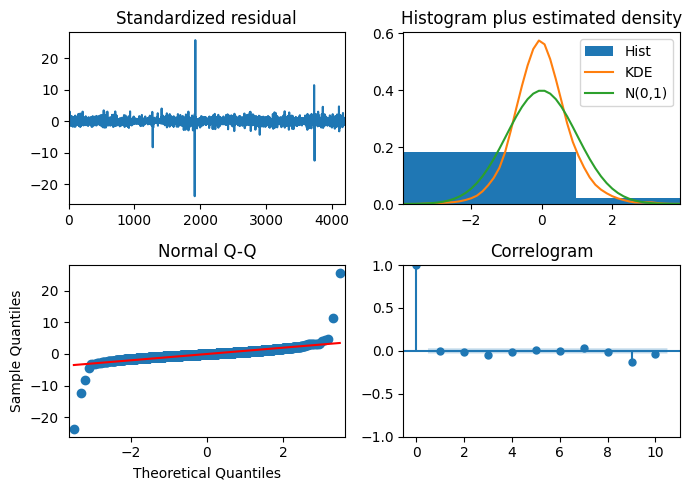

In [60]:
# Residual Charts for "Depth_to_Groundwater_P25"
print("Residuals Charts")
arima_model.plot_diagnostics(figsize=(7,5))
plt.tight_layout()
plt.show()

PLOT DIAGNOSTICS:

Standardized residual: The residual errors seem to fluctuate around a mean of zero except several cases.

Histogram: The density plot suggest normal distribution of the residual errors with mean zero.

Normal Q-Q: The dots fall mostly in line with the red line except some outliners.

Correlogram: The Correlogram plot shows that the residual errors are not very autocorrelated. 

Overall, it seems to be a not very good fit.

In [61]:
# ARIMA model summary for "Depth_to_Groundwater_P25"
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4198
Model:               SARIMAX(4, 0, 3)   Log Likelihood                4691.532
Date:                Mon, 17 Feb 2025   AIC                          -9367.065
Time:                        10:19:07   BIC                          -9316.326
Sample:                             0   HQIC                         -9349.123
                               - 4198                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6395      0.039    -16.487      0.000      -0.716      -0.564
ar.L2          0.8768      0.025     34.829      0.000       0.827       0.926
ar.L3          0.7444      0.040     18.654      0.0

The sigma2 represents the variance of the residual values and it is 0.0063 and it is a low value so it could be a good prediction model.

But, the log likelihood that measures how well the statistical model explains the observed data has a value of 4691, a very high value.

So, the model doesn't fit well this time series data.

Probably, the fit of the model is not good because the time series was not stationary.

In [62]:
# Model prediction for "Depth_to_Groundwater_P25" for 365 days
forecast = arima_model.predict(365)
forecast

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


4198   -0.019163
4199   -0.003457
4200   -0.015654
4201   -0.008419
4202   -0.011225
          ...   
4558   -0.008727
4559   -0.008722
4560   -0.008716
4561   -0.008711
4562   -0.008706
Length: 365, dtype: float64

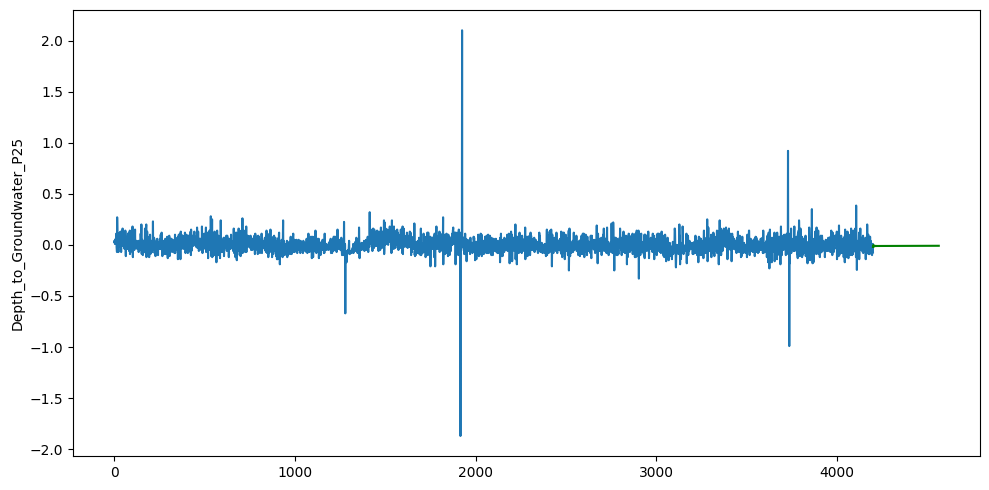

In [63]:
# Plot the time series and the predictions for "Depth_to_Groundwater_P25"
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts_stationary)
sns.lineplot(data = forecast, c = "green")
plt.tight_layout()
plt.show()

Graphically, it seems that this auto ARIMA model is not a good prediction for "Depth_to_Groundwater_P25".
As already commented, "Depth_to_Groundwater_P25" times series is not stationary and the ARIMA model is more adequate if the time series is stationary.